<a href="https://colab.research.google.com/github/sburkley/CS-419/blob/master/projects/Sally's_CrateAndBarrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sally Burkley 11-5-2020
- I used the XGBoost model for this project.
1. unzipped the data
2. printed them out to make sure it came through okay
3. put data into dataframes
4. split the trainning data into features and labels
5. created the xgboost model
6. created a param grid with a wide range of estimators
7. increased the folds to further accuracy
8. fit the data with the best estimator
9. calculated the prediction
10. one hot encoded the categories so it was in a format where ID matched up with a 1 in a category (sorted them)

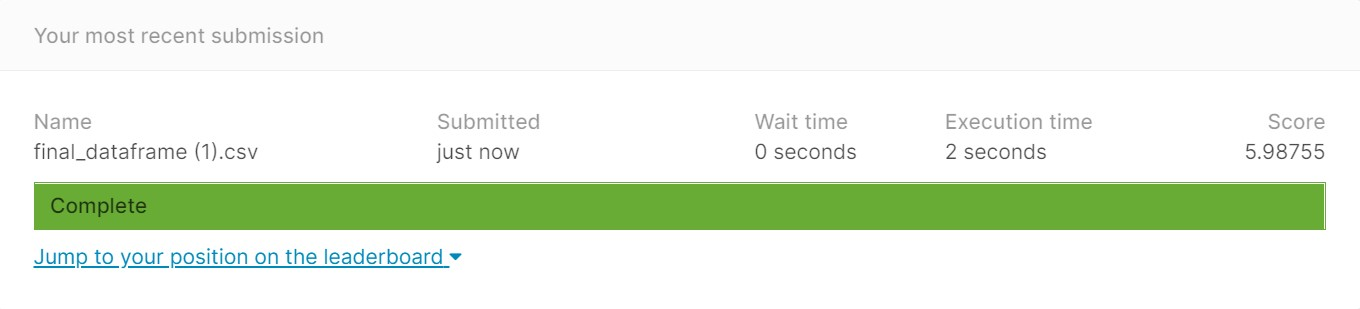

In [2]:
import pandas as pd

In [5]:
#opened up the train and test data from kaggle
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [6]:
!ls

sample_data  test.csv  test.csv.zip  train.csv	train.csv.zip


In [73]:
train_data = pd.read_csv("train.csv", index_col="id")
test_data = pd.read_csv("test.csv", index_col="id")
train_data_features = train_data.drop('target', axis=1)
train_data_labels = train_data['target']

test_data #test does not have a target row in it

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,...,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144364,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5,0,0,1,0,1,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0,2,0,0,9,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0
144365,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,11,0,0,0,0,0
144366,0,1,0,0,0,0,1,1,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,1,0,3,1,0,6,...,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,5,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,3,1,1,0,0,1,0,0


In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
#crafted the model
model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

param_grid = [{'n_estimators': [50, 100, 150, 200, 400], 
    'max_depth': [2, 4, 6, 8, 9]}]

param_comb = 5
folds=8 #did eight folds so it doesn't over fit it
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001) #random shuffle and then search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb,  n_jobs=-1, 
                                   cv=skf.split(train_data_features, train_data_labels), verbose=3)

In [71]:
%%time 
grid_result = random_search.fit(train_data_features, train_data_labels) #fit the data

Fitting 8 folds for each of 5 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 19.2min finished


CPU times: user 32.4 s, sys: 13 s, total: 45.3 s
Wall time: 19min 54s


In [74]:
predictions = random_search.best_estimator_.predict(test_data) #do the predictions with the best estimator
predictions

array(['Class_4', 'Class_6', 'Class_6', ..., 'Class_2', 'Class_4',
       'Class_2'], dtype=object)

In [75]:
# put the predictions into the test data so they apply to the right row
test_data['cat'] = predictions
# one hot encode to single out the classes matched with the appropriate ID
final = pd.get_dummies(test_data['cat']) 

final
final.to_csv('final_dataframe.csv', index=True) # I used to_csv to save it to files